# Some Unpleasant Monetarist Arithmetic 

## Overview


This lecture builds on concepts and issues introduced in {doc}`money_inflation`.

That lecture describes stationary equilibria that reveal a [*Laffer curve*](https://en.wikipedia.org/wiki/Laffer_curve) in the inflation tax rate and the associated  stationary rate of return 
on currency.  

In this lecture we study  a situation  in which a stationary equilibrium prevails after  date $T > 0$, but not before then.  

For $t=0, \ldots, T-1$, the money supply,  price level, and interest-bearing government debt vary along a transition path that ends at $t=T$.

During this transition, the ratio of the real balances $\frac{m_{t+1}}{{p_t}}$ to indexed one-period  government bonds $\tilde R B_{t-1}$  maturing at time $t$ decreases each period. 

This has consequences for the **gross-of-interest** government deficit that must be financed by printing money for times $t \geq T$. 

The critical **money-to-bonds** ratio stabilizes only at time $T$ and afterwards.

And the larger is $T$, the higher is the gross-of-interest government deficit that must be financed
by printing money at times $t \geq T$. 

These outcomes are the essential finding of Sargent and Wallace's "unpleasant monetarist arithmetic" {cite}`sargent1981`.

That lecture  described  supplies and demands for money that appear in lecture.

It also   characterized the steady state equilibrium from which we work backwards in this lecture. 

In addition to learning about "unpleasant monetarist arithmetic", in this lecture we'll learn how to implement a [*fixed point*](https://en.wikipedia.org/wiki/Fixed_point_(mathematics)) algorithm for computing an initial price level.


## Setup

Let's start with quick reminders of the model's components set out in {doc}`money_inflation`.

Please consult that lecture for more details and Python code that we'll also use in this lecture.

For $t \geq 1$, **real balances** evolve according to


$$
\frac{m_{t+1}}{p_t} - \frac{m_{t}}{p_{t-1}} \frac{p_{t-1}}{p_t} = g
$$

or

$$
b_t - b_{t-1} R_{t-1} = g
$$ (eq:up_bmotion)

where

* $b_t = \frac{m_{t+1}}{p_t}$ is real balances at the end of period $t$
* $R_{t-1} = \frac{p_{t-1}}{p_t}$ is the gross rate of return on real balances held from $t-1$ to $t$

The demand for real balances is 

$$
b_t = \gamma_1 - \gamma_2 R_t^{-1} . 
$$ (eq:up_bdemand)

where $\gamma_1 > \gamma_2 > 0$.

## Monetary-Fiscal Policy

To the basic model of {doc}`money_inflation`, we add inflation-indexed one-period government bonds as an additional way for the government to finance government expenditures. 

Let $\widetilde R > 1$ be a time-invariant gross real rate of return on government one-period inflation-indexed bonds.

With this additional source of funds, the government's budget constraint at time $t \geq 0$ is now

$$
B_t + \frac{m_{t+1}}{p_t} = \widetilde R B_{t-1} + \frac{m_t}{p_t} + g
$$ 


Just before the beginning of time $0$, the  public owns  $\check m_0$ units of currency (measured in dollars)
and $\widetilde R \check B_{-1}$ units of one-period indexed bonds (measured in time $0$ goods); these two quantities are initial conditions set outside the model.

Notice that $\check m_0$ is a *nominal* quantity, being measured in dollars, while
$\widetilde R \check B_{-1}$ is a *real* quantity, being measured in time $0$ goods.


### Open market operations

At time $0$, government can rearrange its portfolio of debts subject to the following constraint (on open-market operations):

$$
\widetilde R B_{-1} + \frac{m_0}{p_0} = \widetilde R \check B_{-1} + \frac{\check m_0}{p_0}
$$

or

$$
B_{-1} - \check B_{-1} = \frac{1}{p_0 \widetilde R} \left( \check m_0 - m_0 \right)  
$$ (eq:openmarketconstraint)

This equation says that the government (e.g., the central bank) can *decrease* $m_0$ relative to 
$\check m_0$ by *increasing* $B_{-1}$ relative to $\check B_{-1}$. 

This is a version of a standard constraint on a central bank's [**open market operations**](https://www.federalreserve.gov/monetarypolicy/openmarket.htm) in which it expands the stock of money by buying government bonds from  the public. 

## An open market operation at $t=0$

Following Sargent and Wallace {cite}`sargent1981`, we analyze consequences of a central bank policy that 
uses an open market operation to lower the price level in the face of a persistent fiscal
deficit that takes the form of a positive $g$.

Just before time $0$, the government chooses $(m_0, B_{-1})$  subject to constraint
{eq}`eq:openmarketconstraint`.

For $t =0, 1, \ldots, T-1$,

$$
\begin{aligned}
B_t & = \widetilde R B_{t-1} + g \cr
m_{t+1} &  = m_0 
\end{aligned}
$$

while for $t \geq T$,

$$
\begin{aligned}
B_t & = B_{T-1} \cr
m_{t+1} & = m_t + p_t \overline g
\end{aligned}
$$

where 

$$
\overline g = \left[(\tilde R -1) B_{T-1} +  g \right]
$$ (eq:overlineg)

We want to compute an equilibrium $\{p_t,m_t,b_t, R_t\}_{t=0}$ sequence under this scheme for
running monetary and fiscal policies.

Here, by **fiscal policy** we mean the collection of actions that determine a sequence of net-of-interest government deficits $\{g_t\}_{t=0}^\infty$ that must be financed by issuing to the public  either money or interest bearing bonds.

By **monetary policy** or **debt-management policy**, we  mean the collection of actions that determine how the government divides its  portfolio of debts to the public  between interest-bearing parts (government bonds) and non-interest-bearing parts (money).

By an **open market operation**, we mean a government monetary policy action in which the government
(or its delegate, say, a central bank) either buys  government bonds from the public for newly issued money, or sells  bonds to the public and withdraws the money it receives from public circulation.  

## Algorithm (basic idea)


We work backwards from $t=T$ and first compute $p_T, R_u$ associated with the low-inflation, low-inflation-tax-rate stationary equilibrium in {doc}`money_inflation_nonlinear`.

To start our description of our algorithm, it is useful to recall that a stationary rate of return
on currency $\bar R$ solves the quadratic equation

$$
-\gamma_2 + (\gamma_1 + \gamma_2 - \overline g) \bar R - \gamma_1 \bar R^2 = 0
$$ (eq:up_steadyquadratic)

Quadratic equation {eq}`eq:up_steadyquadratic` has two roots, $R_l < R_u < 1$.

For reasons described at the end of {doc}`money_inflation`, we select the larger root $R_u$. 


Next, we compute

$$
\begin{aligned}
R_T & = R_u \cr
b_T & = \gamma_1 - \gamma_2 R_u^{-1} \cr
p_T & = \frac{m_0}{\gamma_1 - \overline g - \gamma_2 R_u^{-1}}
\end{aligned}
$$ (eq:LafferTstationary)


We can compute continuation sequences $\{R_t, b_t\}_{t=T+1}^\infty$ of rates of return and real balances that are associated with an equilibrium by solving equation {eq}`eq:up_bmotion` and {eq}`eq:up_bdemand` sequentially  for $t \geq 1$:

$$
\begin{aligned}
b_t & = b_{t-1} R_{t-1} + \overline g \cr
R_t^{-1} & = \frac{\gamma_1}{\gamma_2} - \gamma_2^{-1} b_t \cr
p_t & = R_t p_{t-1} \cr
   m_t & = b_{t-1} p_t 
\end{aligned}
$$
   

## Before time $T$ 

Define 

$$
\lambda \equiv \frac{\gamma_2}{\gamma_1}.
$$

Our restrictions that $\gamma_1 > \gamma_2 > 0$ imply that $\lambda \in [0,1)$.

We want to compute

$$ 
\begin{aligned}
p_0 &  = \gamma_1^{-1} \left[ \sum_{j=0}^\infty \lambda^j m_{j} \right] \cr
& = \gamma_1^{-1} \left[ \sum_{j=0}^{T-1} \lambda^j m_{0} + \sum_{j=T}^\infty \lambda^j m_{1+j} \right]
\end{aligned}
$$

Thus,

$$
\begin{aligned}
p_0 & = \gamma_1^{-1} m_0  \left\{ \frac{1 - \lambda^T}{1-\lambda} +  \frac{\lambda^T}{R_u-\lambda}   \right\} \cr
p_1 & = \gamma_1^{-1} m_0  \left\{ \frac{1 - \lambda^{T-1}}{1-\lambda} +  \frac{\lambda^{T-1}}{R_u-\lambda}   \right\} \cr
\quad \vdots  & \quad \quad \vdots \cr
p_{T-1} & = \gamma_1^{-1} m_0  \left\{ \frac{1 - \lambda}{1-\lambda} +  \frac{\lambda}{R_u-\lambda}   \right\}  \cr
p_T & = \gamma_1^{-1} m_0  \left\{\frac{1}{R_u-\lambda}   \right\}
\end{aligned}
$$ (eq:allts)

We can implement  the preceding formulas by iterating on

$$
p_t = \gamma_1^{-1} m_0 + \lambda p_{t+1}, \quad t = T-1, T-2, \ldots, 0
$$

starting from  

$$
p_T =   \frac{m_0}{\gamma_1 - \overline g - \gamma_2 R_u^{-1}}  = \gamma_1^{-1} m_0  \left\{\frac{1}{R_u-\lambda} \right\}
$$ (eq:pTformula)

```{prf:remark}
We can verify the equivalence of the two formulas on the right sides of {eq}`eq:pTformula` by recalling that 
$R_u$ is a root of the quadratic equation {eq}`eq:up_steadyquadratic` that determines steady state rates of return on currency.
```
 
## Algorithm (pseudo code)

Now let's describe a computational algorithm in more detail in the form of a description
that constitutes pseudo code because it approaches a set of instructions we could provide to a 
Python coder.

To compute an equilibrium, we deploy the following algorithm.

```{prf:algorithm}
Given *parameters* include $g, \check m_0, \check B_{-1}, \widetilde R >1, T $.

We define a mapping from $p_0$ to $\widehat p_0$ as follows.

* Set $m_0$ and then compute $B_{-1}$ to satisfy the constraint on time $0$ **open market operations**

$$
B_{-1}- \check B_{-1}  = \frac{\widetilde R}{p_0} \left( \check m_0 - m_0 \right)
$$

* Compute $B_{T-1}$ from

$$
B_{T-1} = \widetilde R^T B_{-1} + \left( \frac{1 - \widetilde R^T}{1-\widetilde R} \right) g
$$

* Compute 

$$
\overline g = g + \left[ \tilde R - 1\right] B_{T-1}
$$



* Compute $R_u, p_T$ from formulas {eq}`eq:up_steadyquadratic`  and {eq}`eq:LafferTstationary` above

* Compute a new estimate of $p_0$, call it $\widehat p_0$, from equation {eq}`eq:allts` above

* Note that the preceding steps define a mapping

$$
\widehat p_0 = {\mathcal S}(p_0)
$$

* We seek a fixed point of ${\mathcal S}$, i.e., a solution of $p_0 = {\mathcal S}(p_0)$.

* Compute a fixed point by iterating to convergence on the relaxation algorithm

$$
p_{0,j+1} = (1-\theta)  {\mathcal S}(p_{0,j})  + \theta  p_{0,j}, 
$$

where $\theta \in [0,1)$ is a relaxation parameter.
```

## Example Calculations

We'll set parameters of the model so that the steady state after time $T$ is initially the same
as in {doc}`money_inflation_nonlinear`

In particular, we set $\gamma_1=100, \gamma_2 =50, g=3.0$.  We set $m_0 = 100$ in that lecture,
but now the counterpart will be $M_T$, which is endogenous.  

As for new parameters, we'll set $\tilde R = 1.01, \check B_{-1} = 0, \check m_0 = 105, T = 5$.

We'll study a "small" open market operation by setting $m_0 = 100$.

These parameter settings mean that just before time $0$, the "central bank" sells the public bonds in exchange for $\check m_0 - m_0 = 5$ units of currency.  

That leaves the public with less currency but more government interest-bearing bonds.

Since the public has less currency (its supply has diminished) it is plausible to anticipate that the price level at time $0$ will be driven downward.

But that is not the end of the story, because this **open market operation** at time $0$ has consequences for future settings of $m_{t+1}$ and the gross-of-interest government deficit $\bar g_t$. 


Let's start with some imports:

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from collections import namedtuple

Now let's dive in and implement our pseudo code in Python.

In [2]:
# Create a namedtuple that contains parameters
MoneySupplyModel = namedtuple("MoneySupplyModel", 
                              ["γ1", "γ2", "g",
                               "R_tilde", "m0_check", "Bm1_check",
                               "T"])

def create_model(γ1=100, γ2=50, g=3.0,
                 R_tilde=1.01,
                 Bm1_check=0, m0_check=105,
                 T=5):
    
    return MoneySupplyModel(γ1=γ1, γ2=γ2, g=g,
                            R_tilde=R_tilde,
                            m0_check=m0_check, Bm1_check=Bm1_check,
                            T=T)

In [3]:
msm = create_model()

In [4]:
def S(p0, m0, model):

    # unpack parameters
    γ1, γ2, g = model.γ1, model.γ2, model.g
    R_tilde = model.R_tilde
    m0_check, Bm1_check = model.m0_check, model.Bm1_check
    T = model.T

    # open market operation
    Bm1 = 1 / (p0 * R_tilde) * (m0_check - m0) + Bm1_check

    # compute B_{T-1}
    BTm1 = R_tilde ** T * Bm1 + ((1 - R_tilde ** T) / (1 - R_tilde)) * g

    # compute g bar
    g_bar = g + (R_tilde - 1) * BTm1

    # solve the quadratic equation
    Ru = np.roots((-γ1, γ1 + γ2 - g_bar, -γ2)).max()

    # compute p0
    λ = γ2 / γ1
    p0_new = (1 / γ1) * m0 * ((1 - λ ** T) / (1 - λ) + λ ** T / (Ru - λ))

    return p0_new

In [5]:
def compute_fixed_point(m0, p0_guess, model, θ=0.5, tol=1e-6):

    p0 = p0_guess
    error = tol + 1

    while error > tol:
        p0_next = (1 - θ) * S(p0, m0, model) + θ * p0

        error = np.abs(p0_next - p0)
        p0 = p0_next

    return p0

Let's look at how  price level $p_0$  in the stationary  $R_u$ equilibrium  depends on the initial
money supply $m_0$.  

Notice that the slope of $p_0$ as a function of $m_0$ is constant.

This outcome indicates that our model verifies a quantity theory of money outcome,
something that Sargent and Wallace {cite}`sargent1981` purposefully built into their model to justify
the adjective *monetarist* in their title.

In [6]:
m0_arr = np.arange(10, 110, 10)

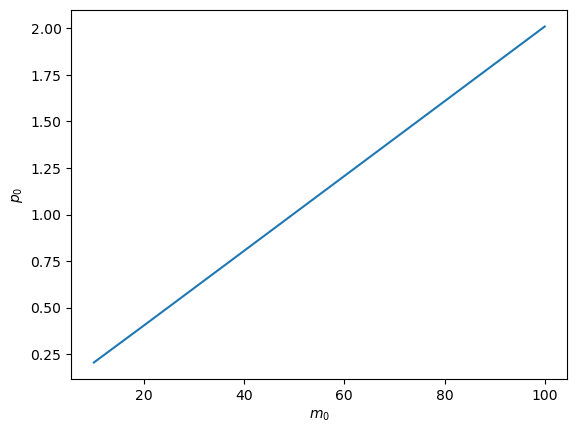

In [7]:
plt.plot(m0_arr, [compute_fixed_point(m0, 1, msm) for m0 in m0_arr])

plt.ylabel('$p_0$')
plt.xlabel('$m_0$')

plt.show()

Now let's write and implement code that lets us experiment with the time $0$ open market operation described earlier.

In [8]:
def simulate(m0, model, length=15, p0_guess=1):

    # unpack parameters
    γ1, γ2, g = model.γ1, model.γ2, model.g
    R_tilde = model.R_tilde
    m0_check, Bm1_check = model.m0_check, model.Bm1_check
    T = model.T

    # (pt, mt, bt, Rt)
    paths = np.empty((4, length))

    # open market operation
    p0 = compute_fixed_point(m0, 1, model)
    Bm1 = 1 / (p0 * R_tilde) * (m0_check - m0) + Bm1_check
    BTm1 = R_tilde ** T * Bm1 + ((1 - R_tilde ** T) / (1 - R_tilde)) * g
    g_bar = g + (R_tilde - 1) * BTm1
    Ru = np.roots((-γ1, γ1 + γ2 - g_bar, -γ2)).max()

    λ = γ2 / γ1

    # t = 0
    paths[0, 0] = p0
    paths[1, 0] = m0

    # 1 <= t <= T
    for t in range(1, T+1, 1):
        paths[0, t] = (1 / γ1) * m0 * \
                      ((1 - λ ** (T - t)) / (1 - λ)
                       + (λ ** (T - t) / (Ru - λ)))
        paths[1, t] = m0

    # t > T
    for t in range(T+1, length):
        paths[0, t] = paths[0, t-1] / Ru
        paths[1, t] = paths[1, t-1] + paths[0, t] * g_bar

    # Rt = pt / pt+1
    paths[3, :T] = paths[0, :T] / paths[0, 1:T+1]
    paths[3, T:] = Ru

    # bt = γ1 - γ2 / Rt
    paths[2, :] = γ1 - γ2 / paths[3, :]

    return paths

In [9]:
def plot_path(m0_arr, model, length=15):

    fig, axs = plt.subplots(2, 2, figsize=(8, 5))
    titles = ['$p_t$', '$m_t$', '$b_t$', '$R_t$']
    
    for m0 in m0_arr:
        paths = simulate(m0, model, length=length)
        for i, ax in enumerate(axs.flat):
            ax.plot(paths[i])
            ax.set_title(titles[i])
    
    axs[0, 1].hlines(model.m0_check, 0, length, color='r', linestyle='--')
    axs[0, 1].text(length * 0.8, model.m0_check * 0.9, '$\check{m}_0$')
    plt.show()

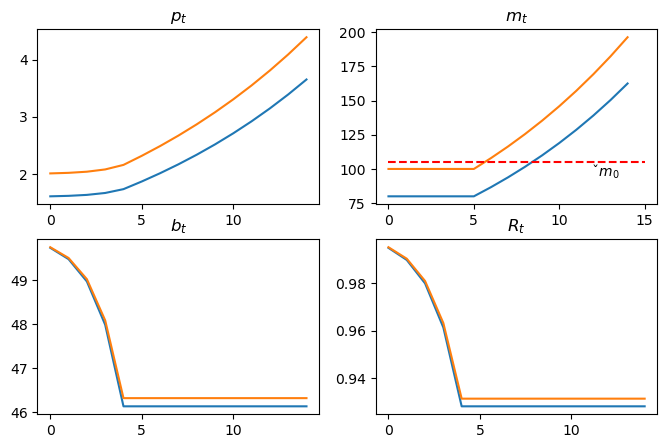

In [10]:
plot_path([80, 100], msm)

{numref}`fig:unpl1` summarizes outcomes of two experiments that convey messages of Sargent and Wallace {cite}`sargent1981`.

* An open market operation that reduces the supply of money at time $t=0$ reduces  the price level at time $t=0$

* The lower is the post-open-market-operation money supply at time $0$, lower is the price level at time $0$.

* An open  market operation that reduces the post open market operation money supply at time $0$ also *lowers* the rate of return on money $R_u$ at times $t \geq T$ because it brings  a higher gross of interest government deficit that must be financed by printing money (i.e., levying an inflation tax) at time $t \geq T$.

* $R$ is important in the context of maintaining monetary stability and addressing the consequences of increased inflation due to government deficits. Thus, a larger $R$ might be chosen to mitigate the negative impacts on the real rate of return caused by inflation.